We have that $p_z(t)=p_y(t)=0$ and $y(t)=z(t)=0\quad\forall t>0$. Indeed, since $\overrightarrow{F}_\perp(0)=0$, the particle will not accelerate in neither $\overrightarrow{e_z}$ nor $\overrightarrow{e_y}$ direction, hence the force will stay at 0. Now, as $\frac{dp_x}{dt}=F_\parallel=F_0$, we have that $p_x(t)=\int_0^tF_0dt=F_0t$. By that we get $E(t)=\sqrt{m^2c^4+p^2c^2}=\sqrt{m^2c^4+F_0^2t^2c^2}$. Then we have that $\gamma = \frac{E}{mc^2} = \sqrt{1+\frac{F_0^2t^2}{m^2c^2}}$ and therefore $v_x=\frac{p_x}{\gamma m}=\frac{F_0t}{\sqrt{m^2+\frac{F_0^2t^2}{c^2}}}$. Once the particle has a speed near c, even when the force acts on it, it is not accelerating (or rather it is accelerating to the speed of light $c$ but never reaches it). Instead, its energy increases indefinitely. To show that, let's compare the speed of an electron when its energy is $10MeV$ and $100MeV$. We have: $$v_x=\frac{p_x}{\gamma m}=\frac{\sqrt{\frac{E^2-m^2c^4}{c^2}}}{\frac{E}{c^2}}.$$ Thus in the first case: $$v_x=299606718.19226205\frac{m}{s}$$ and $$v_x=299996069.7340206\frac{m}{s}.$$ By this we can see that even the energy differ by factor of 10, the velocitites differ by factor of 1.001.


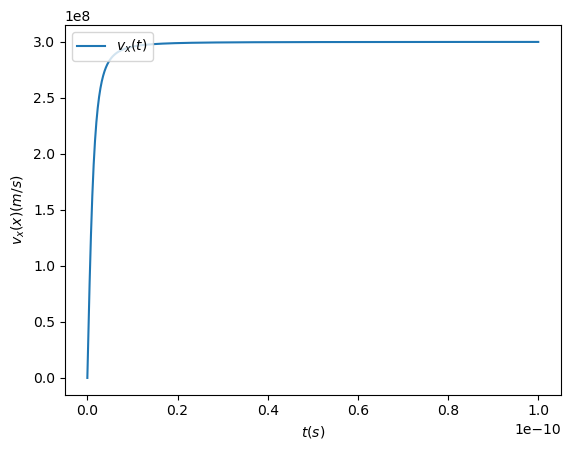

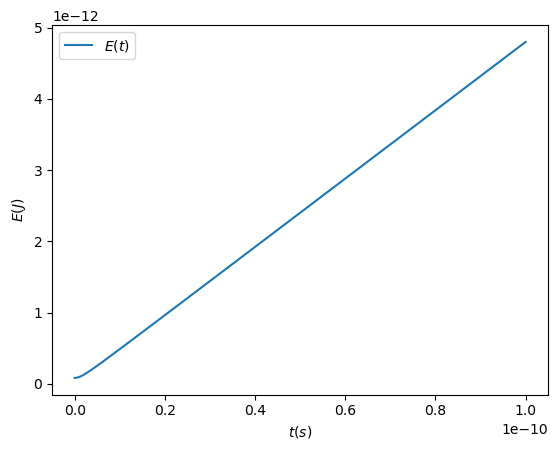

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
alpha = 8*10**(-7)
F = 1.6*10**(-10)
m = 9.1*10**(-31)
c = 3 * 10**8
X = np.linspace(0,10**-10,1000)
Y = F*X/np.sqrt((m**2+(F**2*X**2/c**2)))
plt.plot(X,Y,label='$v_x(t)$')
plt.legend(loc='upper left')
plt.ylabel('$v_x(x)(m/s)$')
plt.xlabel('$t(s)$')
plt.show()
plt.plot(X,m*c**2/np.sqrt(1-Y**2/c**2), label = '$E(t)$')
plt.legend(loc = 'upper left')
plt.xlabel('$t(s)$')
plt.ylabel('$E(J)$')
plt.show()

Case 1:
- since $y_0 = z_0 = 0$ and $p_{y_0} = p_{z_0} = 0$, at $t = 0$ we get that $\frac{dy(0)}{dt} = 0 = \frac{dz(0)}{dt}$ and $\frac{dp_x(0)}{dt} = 0 = \frac{dp_z(0)}{dt}$. Now since the rates of change of $p_y$ and $p_z$ are proportional to $y$ and $z$ respectively and the rate of change of $y$ and $z$ are proportional to $p_y$ and $p_z$, it suggests that $y = cst = 0 = z$ and $p_y = cst = 0 = p_z$.
-Now, since $F_0$ is constant and $p_x(0)=0$ we get that: $$\frac{dp_x}{dt}=F_0 \implies p_x = F_0 t$$ from which
$$\begin{split}
\frac{dx}{dt} = \frac{p_x}{\gamma m} \implies dx=\frac{F_0dt}{\sqrt{1+\frac{F_0^2 t^2}{m^2c^2}}} & \implies x(t) = mc\sinh^{-1}{\frac{F_0t}{mc}} \implies \\ & \implies t = \frac{mc\sinh{\frac{x}{mc}}}{F_0}.
\end{split}$$
Now we can apply these to the equations for $v_x$ and $E$ obtained above:
$$
v_x(x)=\sqrt{\frac{m^2c^2\sinh^2{\frac{x}{mc}}}{m^2+m^2\sinh^2{\frac{x}{mc}}}}=c\sqrt{1-\frac{1}{1+\sinh^2{\frac{x}{mc}}}}
\newline E(x)=\frac{mc^2}{\sqrt{1-\frac{c^2-\frac{c^2}{1+\sinh^2{\frac{x}{mc}}}}{c^2}}}=mc^2\sqrt{1+\sinh^2{\frac{x}{mc}}}.
$$




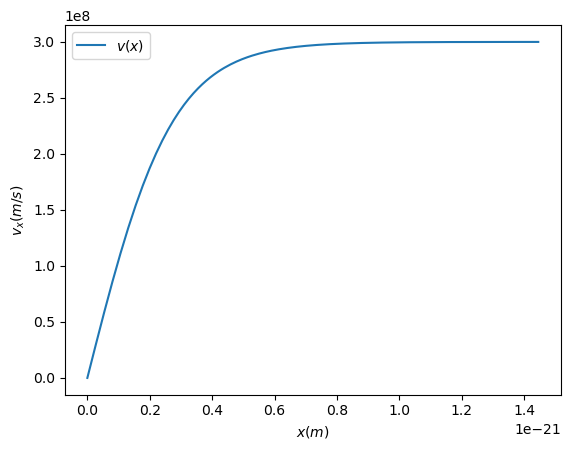

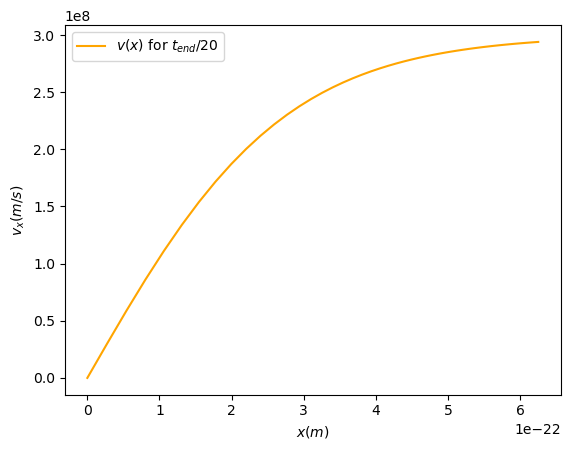

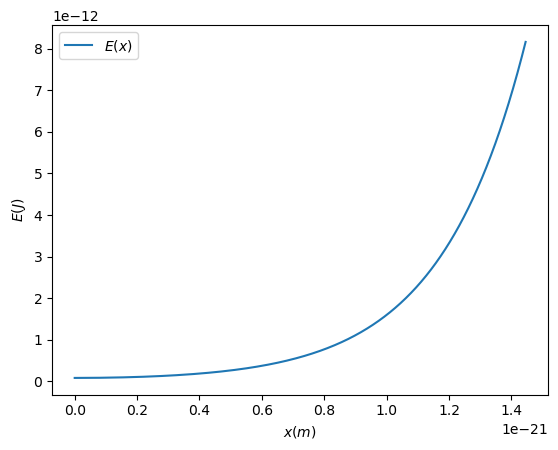

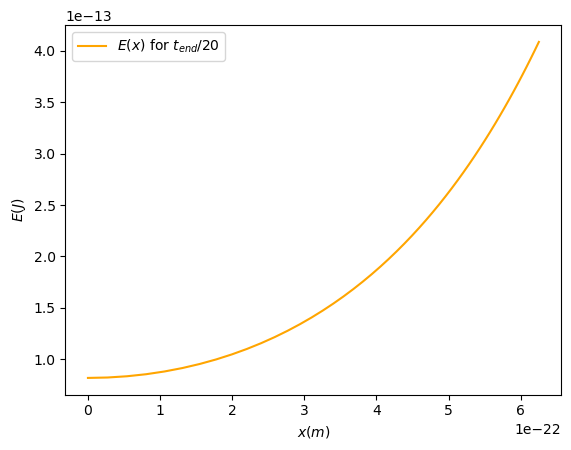

In [9]:
t = np.linspace(0,1.7*10**(-10),1000)
x = m*c*np.arcsinh((F*t)/(m*c))
vx = c*np.sqrt(1-1/(1+np.sinh(x/(m*c))**2))
E = m*c**2*np.sqrt(1+np.sinh(x/(m*c))**2)
plt.plot(x,vx, label = '$v(x)$')
plt.xlabel('$x(m)$')
plt.ylabel('$v_x(m/s)$')
plt.legend(loc='upper left')
plt.show()
plt.plot(x[:50],vx[:50], color = 'orange', label = '$v(x)$ for $t_{end}/20$')
plt.xlabel('$x(m)$')
plt.ylabel('$v_x(m/s)$')
plt.legend(loc = 'upper left')
plt.show()
plt.plot(x,E, label = '$E(x)$')
plt.xlabel('$x(m)$')
plt.ylabel('$E(J)$')
plt.legend(loc ='upper left')
plt.show()
plt.plot(x[:50],E[:50], color = 'orange', label = '$E(x)$ for $t_{end}/20$')
plt.xlabel('$x(m)$')
plt.ylabel('$E(J)$')
plt.legend(loc = 'upper left')
plt.show()

Case 2:
- Since the initial conditions for $z$ and $p_z$ are the same as above, $z = cst =0$ and $p_z = cst = 0$ 
- To solve for $x$ and $y$ we used the Scipy library (code below)

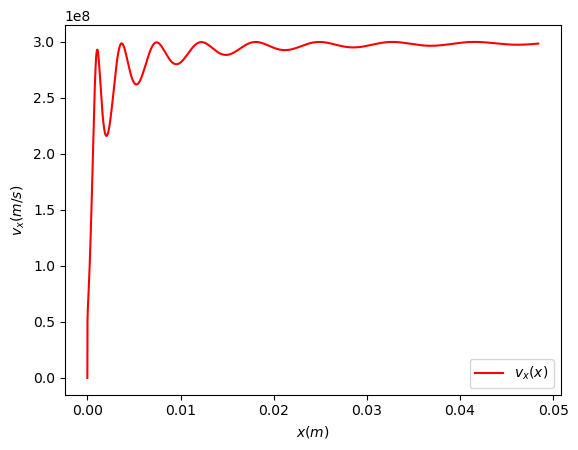

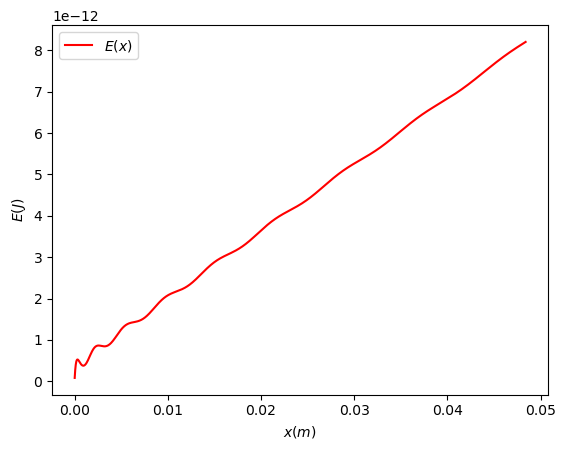

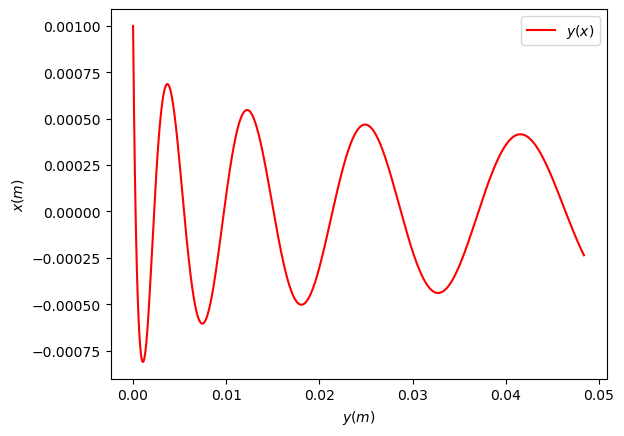

In [10]:
from scipy.integrate import odeint as od

def case2(x, t):

    Y = x[0]
    Py = x[1]
    X = x[2]
    Px = x[3]

    gamma = np.sqrt(1+(Py**2+Px**2)/(m**2*c**2))
    dYdt = Py/(gamma*m)
    dPydt = -alpha*Y
    dxdt = Px/(gamma*m)
    dPxdt = F
    return[dYdt,dPydt,dxdt,dPxdt]

x0 = [10**(-3),0,0,0]
t = np.linspace(0,1.7*10**(-10),1000)
x = od(case2,x0,t)
Y = x[:,0]
Py = x[:,1]
X = x[:,2]
Px = x[:,3]
vx = Px/(m*np.sqrt(1 + (Py**2+Px**2)/(m**2*c**2)))
E = m*c**2*np.sqrt(1 + (Py**2+Px**2)/(m**2*c**2))

plt.plot(X,vx,color = 'red', label='$v_x(x)$')
plt.legend(loc = 'lower right')
plt.xlabel('$x(m)$')
plt.ylabel('$v_x(m/s)$')
plt.show()
plt.plot(X,E, color = 'red', label = '$E(x)$')
plt.legend(loc = 'upper left')
plt.xlabel('$x(m)$')
plt.ylabel('$E(J)$')
plt.show()
plt.plot(X,Y, color = 'red', label = '$y(x)$')
plt.legend(loc = 'upper right')
plt.xlabel('$y(m)$')
plt.ylabel('$x(m)$')
plt.show()


Case 3:
- Since neither for $y$ nor $z$ the initial conditions are the same as in Case 1 we would have to solve for $x,y,z$ using Scipy as well (code below)

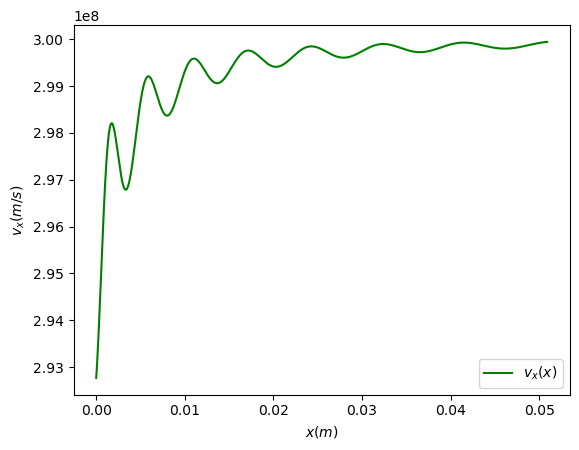

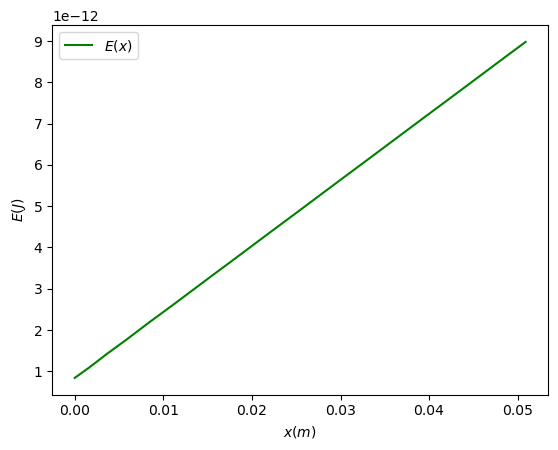

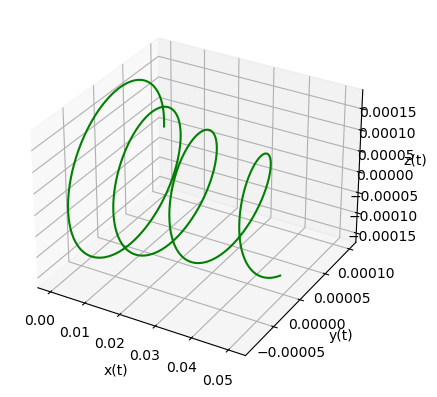

In [11]:
def case3(x, t):
    
    X = x[0]
    Px = x[1]
    Y = x[2]
    Py = x[3]
    Z = x[4]
    Pz = x[5]
    
    gamma = np.sqrt(1+(Px**2+Py**2+Pz**2)/(m**2*c**2))
    dXdt = Px/(m*gamma)
    dPxdt = F
    dYdt = Py/(m*gamma)
    dPydt = -alpha * Y
    dZdt = Pz/(m*gamma)
    dPzdt = -alpha * Z
    
    return[dXdt,dPxdt,dYdt,dPydt,dZdt,dPzdt]
    
x0 = [0,10*m*c,10**(-4),0,0,2*m*c]
x = od(case3,x0,t)
X = x[:,0]
Px = x[:,1]
Y = x[:,2]
Py = x[:,3]
Z = x[:,4]
Pz = x[:,5]
gamma = np.sqrt(1+(Px**2+Py**2+Pz**2)/(m**2*c**2))
vx = Px/(m*gamma)
E = gamma*m*c**2

plt.plot(X,vx, color = 'green', label='$v_x(x)$')
plt.legend(loc='lower right')
plt.xlabel('$x(m)$')
plt.ylabel('$v_x(m/s)$')
plt.show()
plt.plot(X,E, color = 'green', label = '$E(x)$')
plt.legend(loc = 'upper left')
plt.xlabel('$x(m)$')
plt.ylabel('$E(J)$')
plt.show()
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlabel('x(t)')
ax.set_ylabel('y(t)')
ax.set_zlabel('z(t)')
ax.plot(X,Y,Z, color = 'green')
plt.show()